In [1]:
import scipy
print('scipy: %s' % scipy.__version__)

scipy: 1.2.1


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [4]:
#load the data
#import s3fs
from pandas import set_option
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
#import xgboost as xgb
from yellowbrick.classifier import ROCAUC

In [5]:
#load data  'Model_cont.txt'
df = pd.read_csv('Model_cont.txt', sep='\t')
df.head(10)

,specialty_description,state,nppes_credentials,bene_count,bene_count_ge65,brand_claim_count,opioid_claim_count,beneficiary_nondual_count,beneficiary_dual_count,antipsych_claim_count_ge65,antibiotic_claim_count,day_supply_per_claim,generic_drug_cost,mapd_drug_cost,lis_drug_cost,nppes_provider_gender,medicare_prvdr_enroll_status,total_30_day_per_claim,average_age_of_beneficiaries,exclusion_flag
0,Physical Medicine,NY,Optometrist,204.0,163.0,80.0,54.0,89.0,115.0,0.0,22.0,24.702703,15567.64,13754.900,30224.07,1,3,1.039746,71.0,0
1,Nurse,NY,Nurse,65.0,51.0,96.0,0.0,19.0,46.0,5.0,11.0,29.358098,5521.89,18499.150,23179.76,2,3,1.080238,69.0,0
2,Optometry/Ophthalmology,AT,Medical Doctor,1481.0,1244.0,2885.0,0.0,1432.0,49.0,0.0,5.0,28.246292,77403.79,331514.460,13602.53,1,3,1.106108,72.0,0
3,Cardiologist,NY,Medical Doctor,288.0,261.0,234.0,0.0,257.0,31.0,0.0,0.0,72.455482,28982.08,21814.470,3238.77,1,3,2.421118,74.0,0
4,Internal Medicine,FL,Medical Doctor,25.0,20.0,12.0,5.0,89.0,40.0,0.0,11.0,10.924528,618.60,2431.350,1376.33,2,3,1.003774,71.0,0
5,Student,MA,unknown,5.0,0.0,5.0,0.0,89.0,40.0,0.0,0.0,26.809524,8144.09,1306.620,1560.65,1,3,1.002381,71.0,0
6,Optometry/Ophthalmology,IA,Optometrist,37.0,32.0,73.0,0.0,25.0,12.0,0.0,5.0,31.500000,1042.29,5038.525,7027.80,1,3,1.250735,72.0,0
7,Internal Medicine,KY,Medical Doctor,635.0,467.0,2350.0,852.0,386.0,249.0,83.0,384.0,36.500623,271392.68,431825.800,485163.12,1,3,1.328117,69.0,0
8,Dentist,GA,Dentist/DDS,38.0,38.0,0.0,5.0,38.0,0.0,0.0,44.0,5.166667,145.42,48.280,0.00,1,2,1.000000,73.0,0
9,Physician Assistant,FL,Physican Assistant,83.0,78.0,23.0,0.0,41.0,42.0,0.0,12.0,32.238806,2398.16,8225.370,8028.92,2,3,1.335821,76.0,0


In [6]:
# one hot encoding threshold 
tot_instances=df.shape[0]
threshold=tot_instances*0.005
print('The minimum count threshold is: '+str(threshold))

The minimum count threshold is: 25.0


In [7]:
#apply the count threshold to all categorical values
obj_columns=list(df.select_dtypes(include=['object']).columns)

#change everything below threshold to RARE
df = df.apply(lambda x: x.mask(x.map(x.value_counts())<threshold, 'RARE') if x.name in obj_columns else x)

In [8]:
# One hot encode the categorical features in the data
df_encode=pd.get_dummies(data=df, columns=obj_columns)
df_encode.head()  #one hot encoded numeric data

,bene_count,bene_count_ge65,brand_claim_count,opioid_claim_count,beneficiary_nondual_count,beneficiary_dual_count,antipsych_claim_count_ge65,antibiotic_claim_count,day_supply_per_claim,generic_drug_cost,...,state_WI,state_WV,nppes_credentials_DO,nppes_credentials_Dentist/DDS,nppes_credentials_Medical Doctor,nppes_credentials_Nurse,nppes_credentials_Optometrist,nppes_credentials_Physican Assistant,nppes_credentials_RARE,nppes_credentials_unknown
0,204.0,163.0,80.0,54.0,89.0,115.0,0.0,22.0,24.702703,15567.64,...,0,0,0,0,0,0,1,0,0,0
1,65.0,51.0,96.0,0.0,19.0,46.0,5.0,11.0,29.358098,5521.89,...,0,0,0,0,0,1,0,0,0,0
2,1481.0,1244.0,2885.0,0.0,1432.0,49.0,0.0,5.0,28.246292,77403.79,...,0,0,0,0,1,0,0,0,0,0
3,288.0,261.0,234.0,0.0,257.0,31.0,0.0,0.0,72.455482,28982.08,...,0,0,0,0,1,0,0,0,0,0
4,25.0,20.0,12.0,5.0,89.0,40.0,0.0,11.0,10.924528,618.60,...,0,0,0,0,1,0,0,0,0,0


In [10]:
features = df_encode.drop(columns = ['exclusion_flag', 'total_30_day_per_claim']).columns
target   = ['exclusion_flag']
X = df_encode[features]
y = df_encode[target]

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [12]:
def score_model(X_std, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
   # y = LabelEncoder().fit_transform(y)    #already one hot encoded so this is commented out
    #model = Pipeline([
     #    ('one_hot_encoder', OneHotEncoder()), 
      #   ('estimator', estimator)
    #])

    # Instantiate the classification model and visualizer
    model.fit(X_std, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X_std)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

In [13]:
#No adjustments
models = [
    SVC(gamma='auto'), NuSVC(nu= 0.1, gamma='auto'), KNeighborsClassifier(), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), RandomForestClassifier(n_estimators=100), BalancedRandomForestClassifier(n_estimators=100)]

for model in models:
    score_model(X, y, model)

SVC: 0.9359267734553776
NuSVC: 0.9757709251101321
KNeighborsClassifier: 0.15849056603773584
LinearSVC: 0.0
SGDClassifier: 0.0
LogisticRegression: 0.07243460764587525
LogisticRegressionCV: 0.056795131845841784
BaggingClassifier: 0.9339407744874715
ExtraTreesClassifier: 1.0
RandomForestClassifier: 0.9989235737351991
BalancedRandomForestClassifier: 0.5535603715170279


In [14]:
#Scaler adjustments only
models = [
    SVC(gamma='auto'), NuSVC(nu= 0.1, gamma='auto'), KNeighborsClassifier(), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X_std, y, model)

SVC: 0.3386243386243386
NuSVC: 0.8455089820359283
KNeighborsClassifier: 0.39158576051779936
LinearSVC: 0.3911671924290221
SGDClassifier: 0.3897581792318634
LogisticRegression: 0.4836415362731152
LogisticRegressionCV: 0.4865629420084865
BaggingClassifier: 0.95152198421646
ExtraTreesClassifier: 1.0
RandomForestClassifier: 1.0


In [15]:
#Class imbalance adjustments only
models = [
    SVC(gamma='auto', class_weight='balanced'), NuSVC(nu= 0.1, gamma='auto', class_weight='balanced'), 
    KNeighborsClassifier(), LinearSVC(class_weight='balanced'), 
    SGDClassifier(max_iter=100, tol=1e-3, class_weight='balanced'), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100, class_weight='balanced'), 
    BalancedRandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X, y, model)

SVC: 0.9272183449651046
NuSVC: 0.9757709251101321
KNeighborsClassifier: 0.15849056603773584
LinearSVC: 0.2066115702479339
SGDClassifier: 0.08796895213454074
LogisticRegression: 0.07243460764587525
LogisticRegressionCV: 0.056795131845841784
BaggingClassifier: 0.9492671927846675
ExtraTreesClassifier: 1.0
BalancedRandomForestClassifier: 0.5516819571865443


In [16]:
#Class imbalance and Scaler adjustments
models = [
    SVC(gamma='auto', class_weight='balanced'), NuSVC(nu= 0.1, gamma='auto', class_weight='balanced'), 
    KNeighborsClassifier(), LinearSVC(class_weight='balanced'), 
    SGDClassifier(max_iter=100, tol=1e-3, class_weight='balanced'), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100, class_weight='balanced'), 
    BalancedRandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X_std, y, model)

SVC: 0.5927475592747559
NuSVC: 0.8455089820359283
KNeighborsClassifier: 0.39158576051779936
LinearSVC: 0.4656638325703074
SGDClassifier: 0.3704918032786885
LogisticRegression: 0.4836415362731152
LogisticRegressionCV: 0.4865629420084865
BaggingClassifier: 0.9411764705882353
ExtraTreesClassifier: 1.0
BalancedRandomForestClassifier: 0.5467980295566502


Apply SMOTE algorithm and Near Miss to result for class imbalance and scale adjustments test sets

In [17]:
# create SMOTE algorithm 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_std, y)

In [18]:
# Create near miss algorithm 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_train_miss, y_train_miss = nr.fit_sample(X_std, y)

In [19]:
#Class imbalance, Scaler adjustments with SMOTE
models = [
    SVC(gamma='auto', class_weight='balanced'), NuSVC(nu= 0.1, gamma='auto', class_weight='balanced'), 
    KNeighborsClassifier(), LinearSVC(class_weight='balanced'), 
    SGDClassifier(max_iter=100, tol=1e-3, class_weight='balanced'), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100, class_weight='balanced'), 
    BalancedRandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X_train_res, y_train_res, model)    

SVC: 0.9366897147796024
NuSVC: 0.9841789416257503
KNeighborsClassifier: 0.941274468971262
LinearSVC: 0.8372042307272926
SGDClassifier: 0.8028802880288028
LogisticRegression: 0.8384279475982533
LogisticRegressionCV: 0.838611050447696
BaggingClassifier: 0.995798319327731
ExtraTreesClassifier: 1.0
BalancedRandomForestClassifier: 0.9905670846742869


In [20]:
#Class imbalance, Scaler adjustments with NearMiss
models = [
    SVC(gamma='auto', class_weight='balanced'), NuSVC(nu= 0.1, gamma='auto', class_weight='balanced'), 
    KNeighborsClassifier(), LinearSVC(class_weight='balanced'), 
    SGDClassifier(max_iter=100, tol=1e-3, class_weight='balanced'), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100, class_weight='balanced'), 
    BalancedRandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X_train_miss, y_train_miss, model) 

SVC: 0.860730593607306
NuSVC: 0.9782135076252724
KNeighborsClassifier: 0.8254716981132074
LinearSVC: 0.8683914510686163
SGDClassifier: 0.8056968463886064
LogisticRegression: 0.8717948717948718
LogisticRegressionCV: 0.8539576365663322
BaggingClassifier: 0.9858849077090118
ExtraTreesClassifier: 1.0
BalancedRandomForestClassifier: 0.9530054644808744


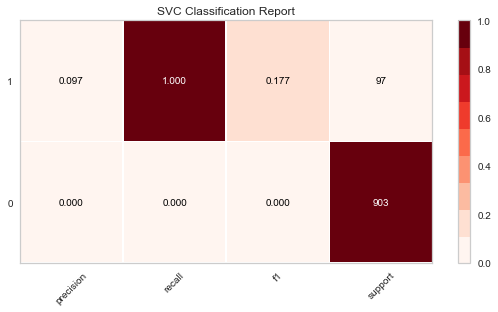

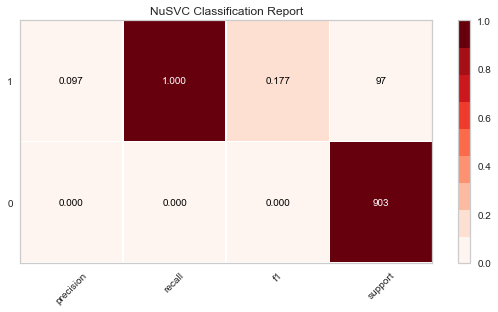

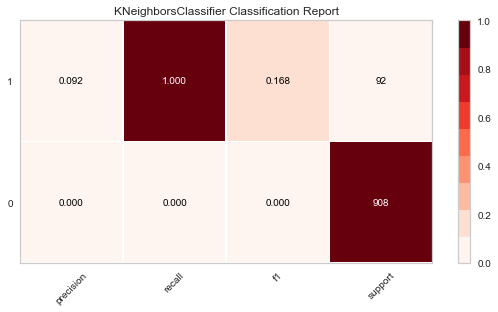

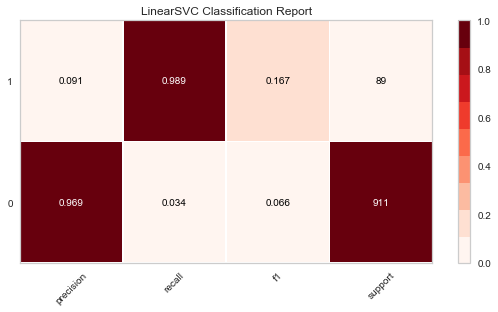

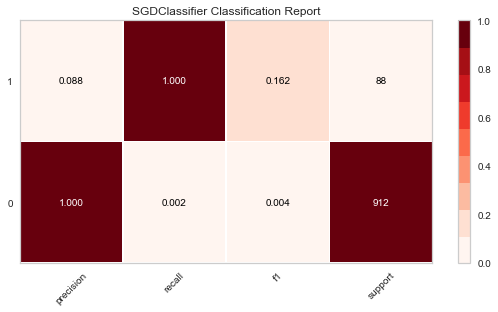

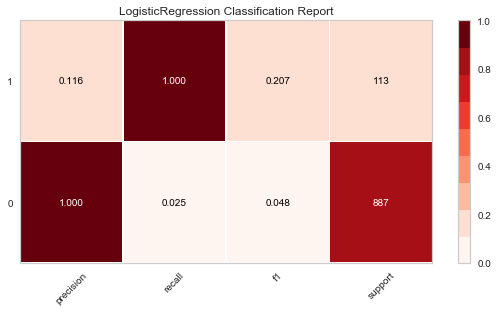

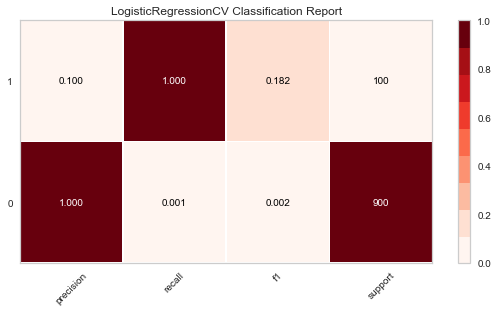

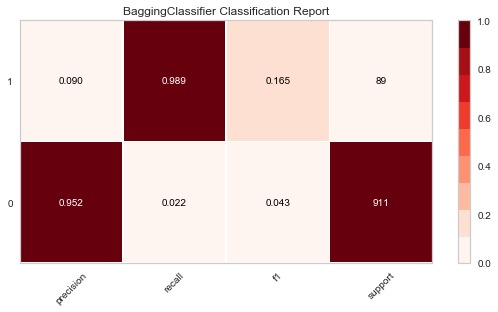

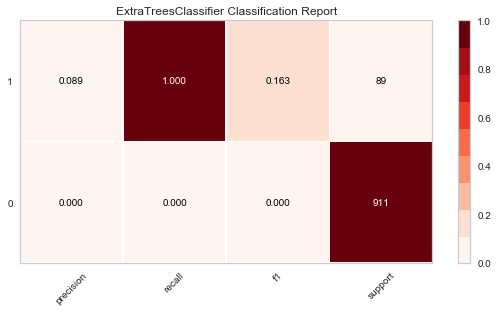

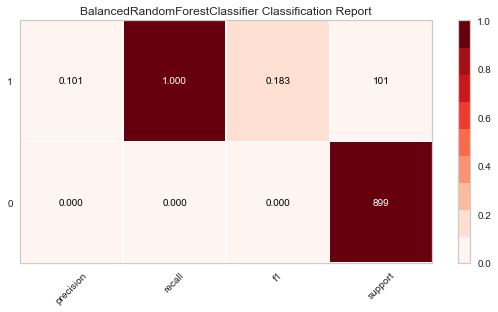

In [21]:
# CLassification report with no ajdustments
def visualize_model(X_std, y, estimator):   
    """
    Test various estimators.
    """ 
    #y = LabelEncoder().fit_transform(y)
    #model = Pipeline([
     #    ('one_hot_encoder', OneHotEncoder()), 
      #   ('estimator', estimator)
    #])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, 
        classes=['0', '1'], 
        cmap="Reds", 
        support=True,
        size=(550, 320)
    )
    
    X_train, X_test, y_train, y_test = tts(X_std, y, test_size=0.20)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

for model in models:
    visualize_model(X, y, model)

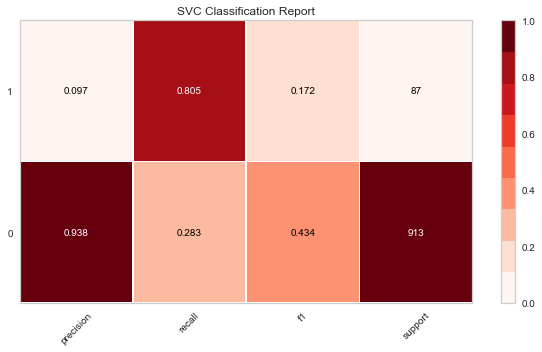

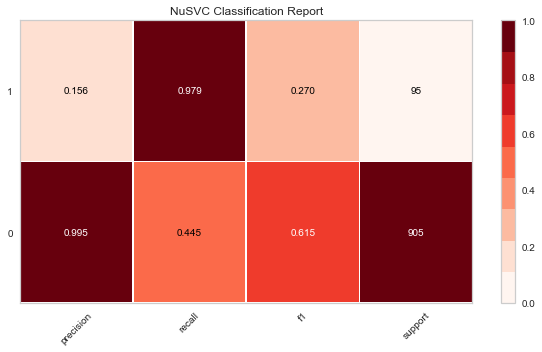

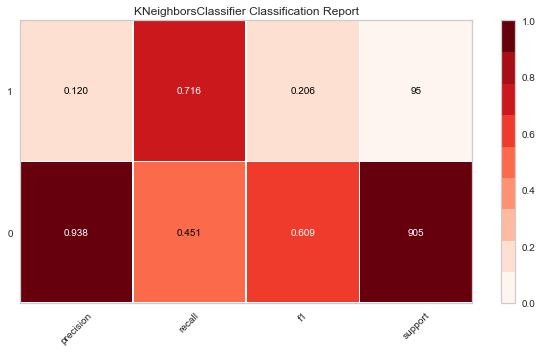

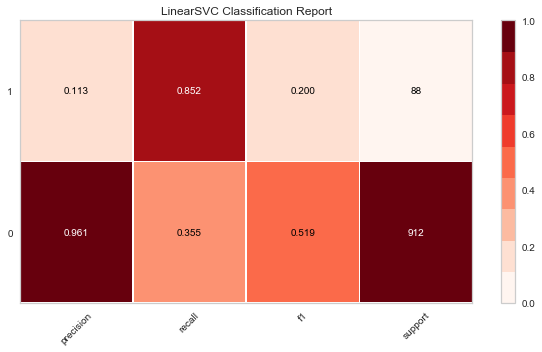

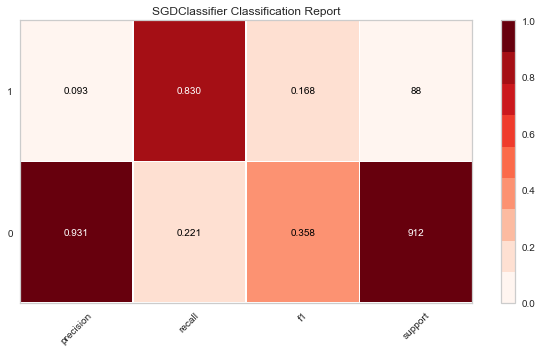

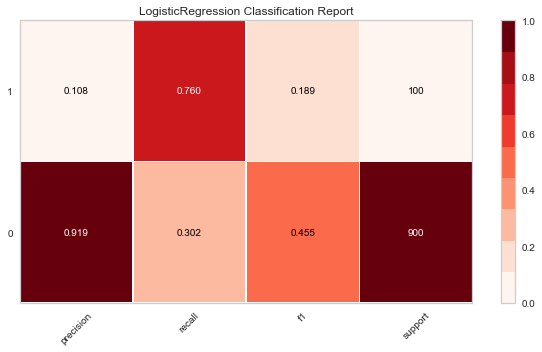

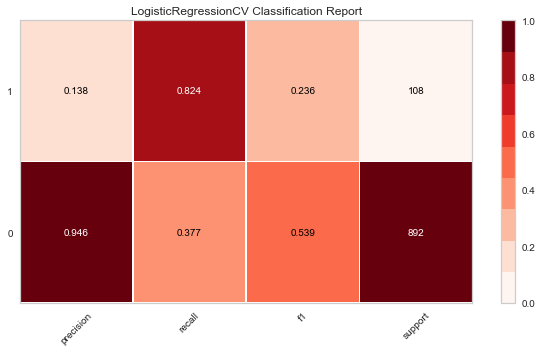

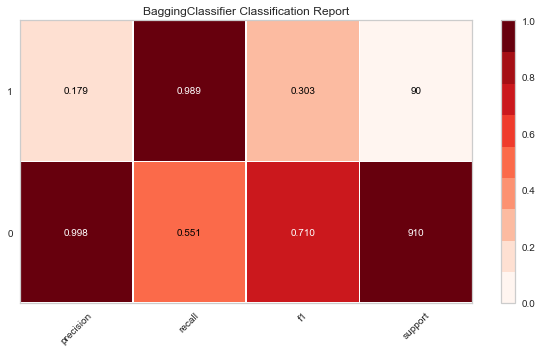

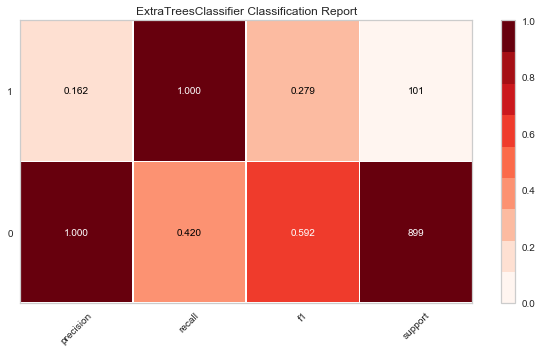

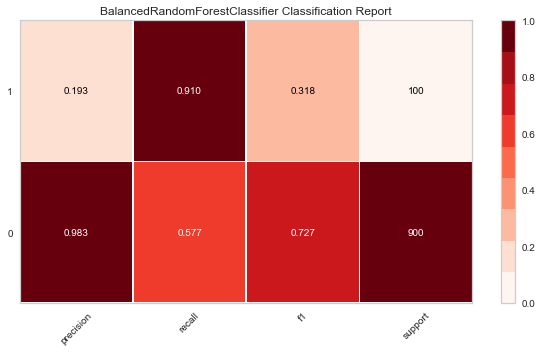

In [22]:
# CLassification report with Class imbalance and Scaler adjustments
def visualize_model(X_std, y, estimator):   
    """
    Test various estimators.
    """ 
    #y = LabelEncoder().fit_transform(y)
    #model = Pipeline([
     #    ('one_hot_encoder', OneHotEncoder()), 
      #   ('estimator', estimator)
    #])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, 
        classes=['0', '1'], 
        cmap="Reds", 
        support=True,
        size=(600, 360)
    )
    
    X_train, X_test, y_train, y_test = tts(X_std, y, test_size=0.20)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

for model in models:
    visualize_model(X_std, y, model)

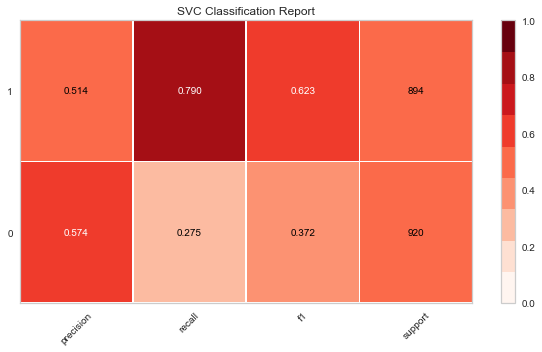

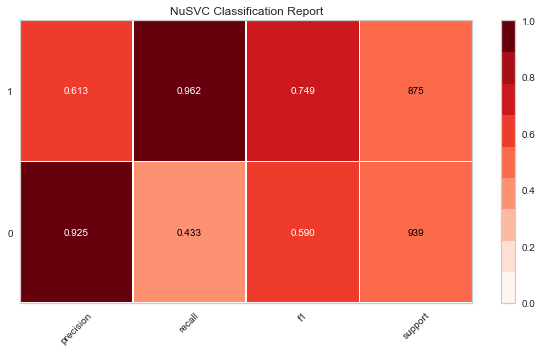

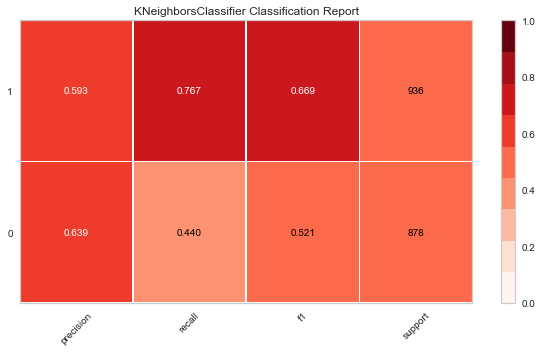

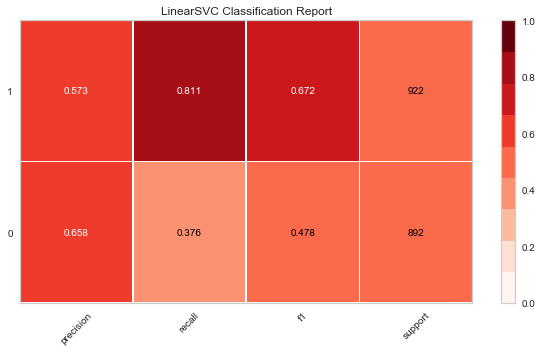

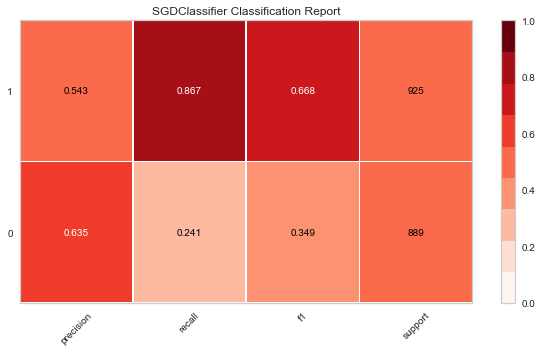

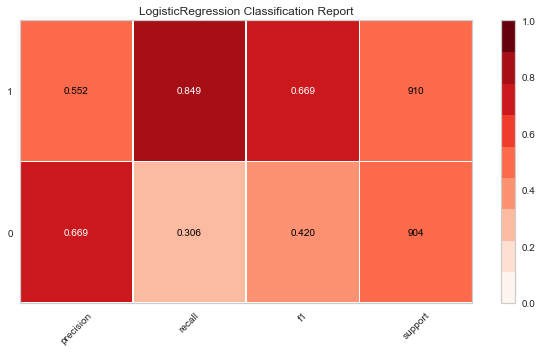

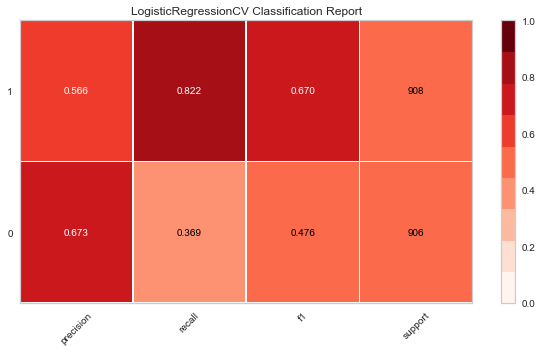

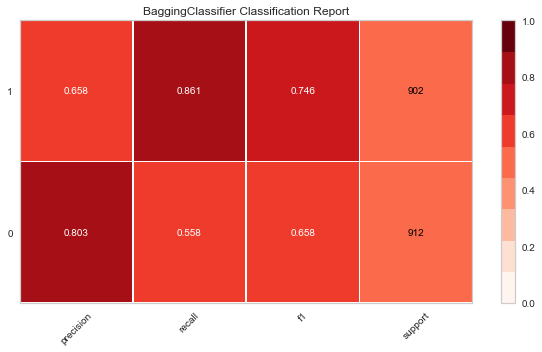

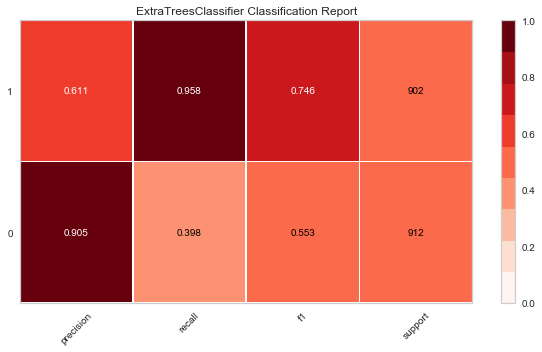

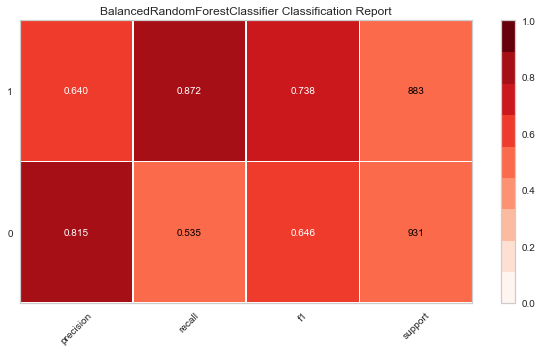

In [23]:
# CLassification report with Class imbalance and Scaler adjustments with SMOTE
def visualize_model(X_train_res, y_train_res, estimator):   
    """
    Test various estimators.
    """ 
    #y = LabelEncoder().fit_transform(y)
    #model = Pipeline([
     #    ('one_hot_encoder', OneHotEncoder()), 
      #   ('estimator', estimator)
    #])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, 
        classes=['0', '1'], 
        cmap="Reds", 
        support=True,
        size=(600, 360)
    )
    
    X_train, X_test, y_train, y_test = tts(X_train_res, y_train_res, test_size=0.20)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

for model in models:
    visualize_model(X_train_res, y_train_res, model)

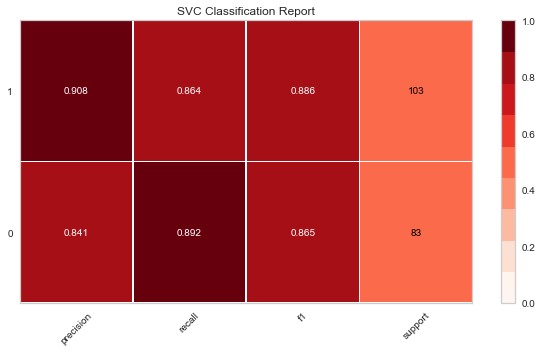

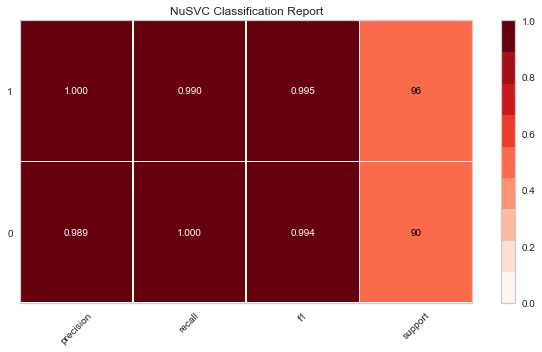

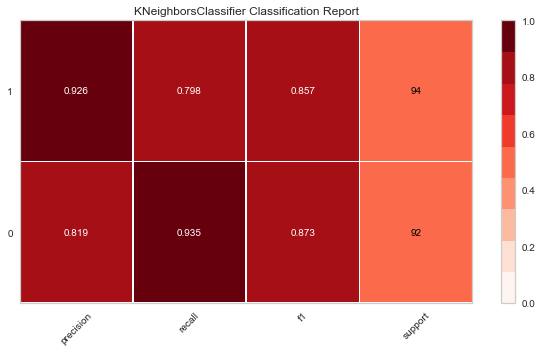

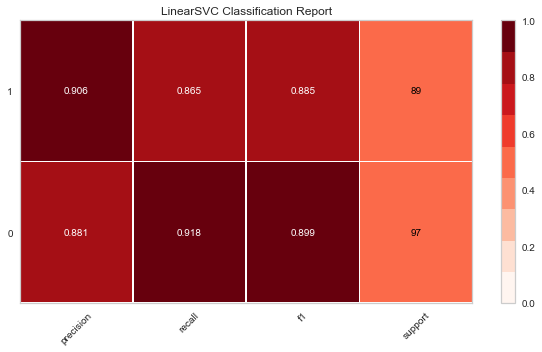

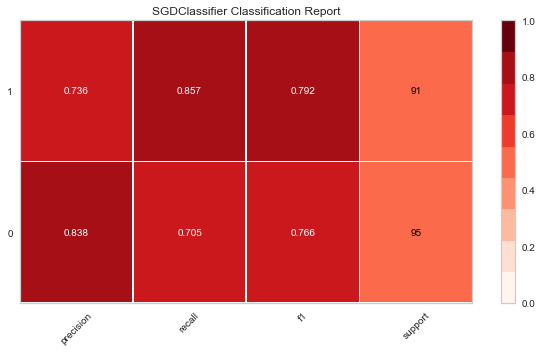

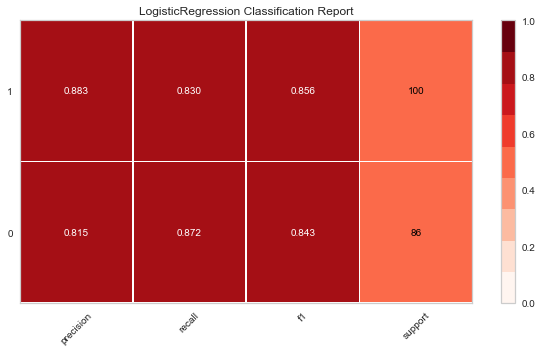

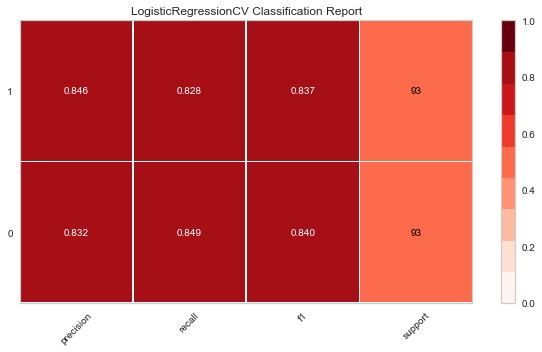

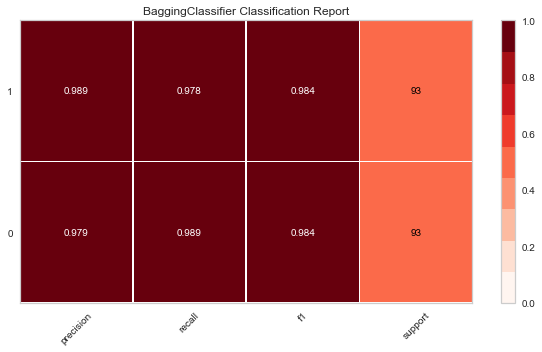

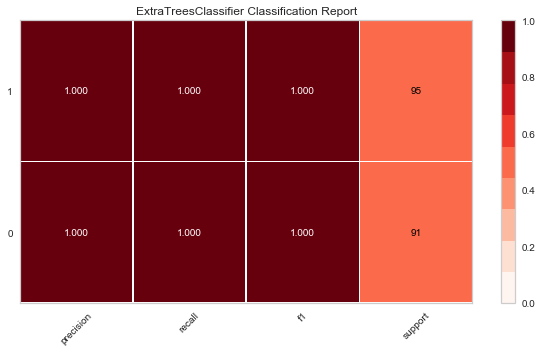

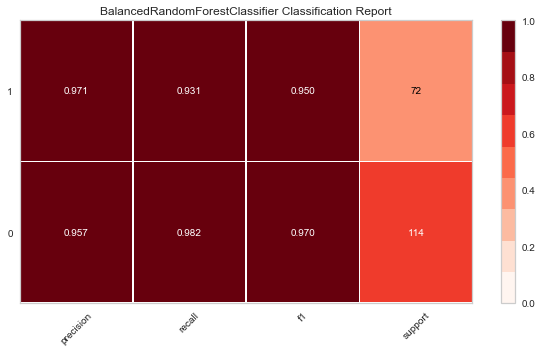

In [24]:
# CLassification report with Class imbalance and Scaler adjustments with NearMiss
def visualize_model(X_train_miss, y_train_miss, estimator):   
    """
    Test various estimators.
    """ 
    #y = LabelEncoder().fit_transform(y)
    #model = Pipeline([
     #    ('one_hot_encoder', OneHotEncoder()), 
      #   ('estimator', estimator)
    #])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, 
        classes=['0', '1'], 
        cmap="Reds", 
        support=True,
        size=(600, 360)
    )
    
    X_train, X_test, y_train, y_test = tts(X_train_miss, y_train_miss, test_size=0.20)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

for model in models:
    visualize_model(X_train_miss, y_train_miss, model)

In [25]:
#Trying to run BalancedBaggingClassifier 
model = [
    BalancedBaggingClassifier()
]

for model in models:
    score_model(X_std, y, model)

SVC: 0.5927475592747559
NuSVC: 0.8455089820359283
KNeighborsClassifier: 0.39158576051779936
LinearSVC: 0.48191126279863483
SGDClassifier: 0.33956834532374097
LogisticRegression: 0.4836415362731152
LogisticRegressionCV: 0.4865629420084865
BaggingClassifier: 0.9552572706935123
ExtraTreesClassifier: 1.0
BalancedRandomForestClassifier: 0.559850374064838


## Cross Validation

In [27]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

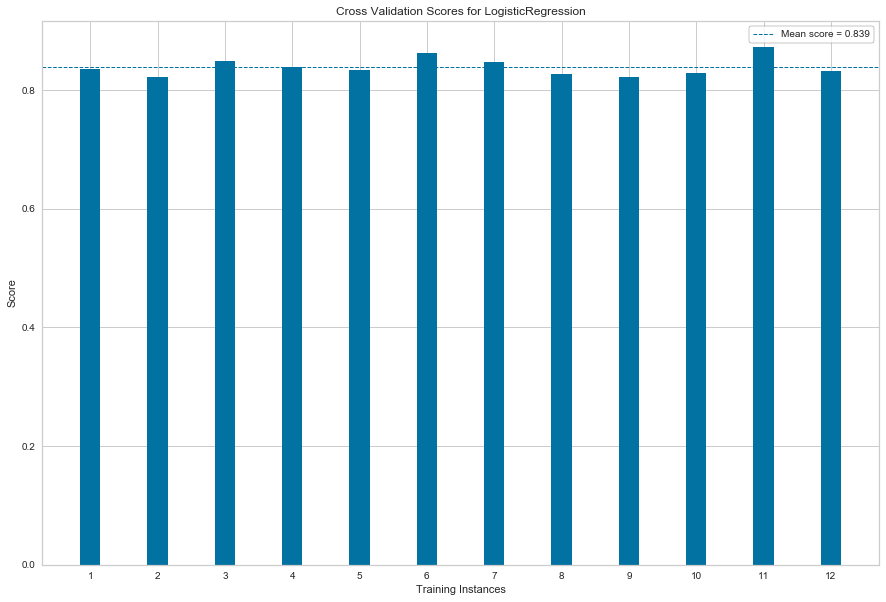

In [28]:
#cross validation logistic regression
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)


#lr_cv_model = LogisticRegressionCV(n_jobs=1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
#lr_cv_model.fit(X_train, Y_train.ravel())


# Instantiate the classification model and visualizer
model = LogisticRegression(n_jobs=1, random_state=42, class_weight="balanced")
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_std, y)
visualizer.show()

SVC

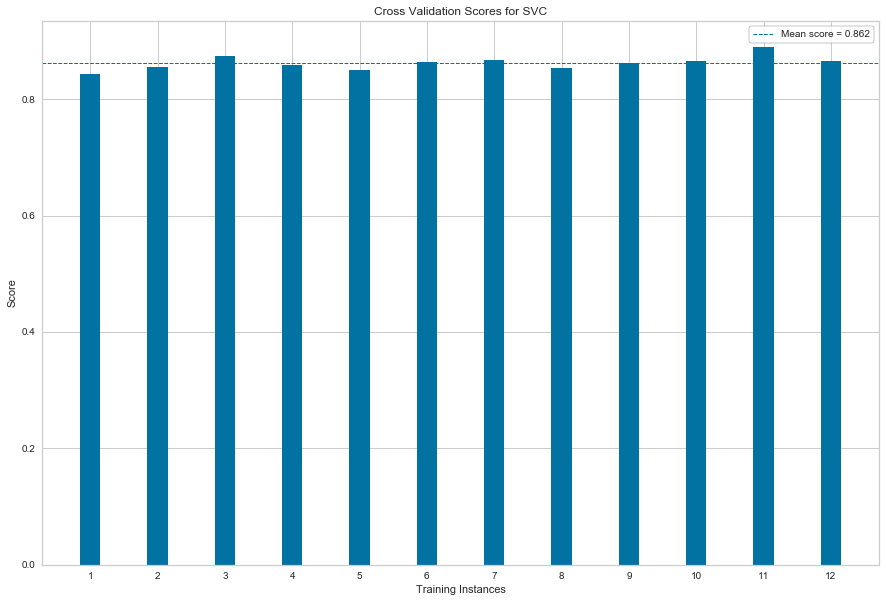

In [125]:
#Class imbalance and Scaler adjustments for SVC

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = SVC(gamma='auto', class_weight='balanced')
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_std, y)
visualizer.show()

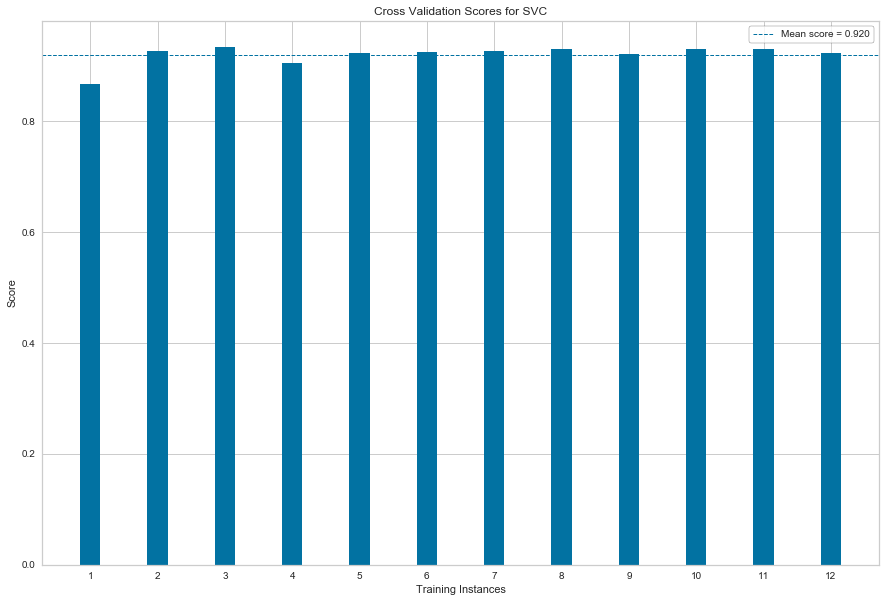

In [126]:
# Class imbalance and Scaler adjustments and SMOTE for SVC

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = SVC(gamma='auto', class_weight='balanced')
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_res, y_train_res)
visualizer.show()

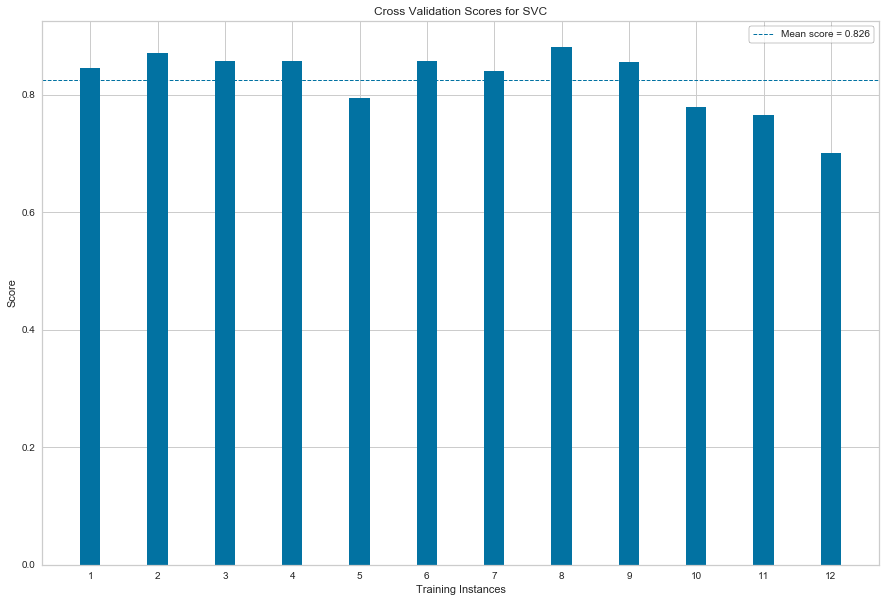

In [127]:
# Class imbalance, Scaler adjustments, and NearMiss for SVC
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = SVC(gamma='auto', class_weight='balanced')
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_miss, y_train_miss)
visualizer.show()

BaggingClassifier

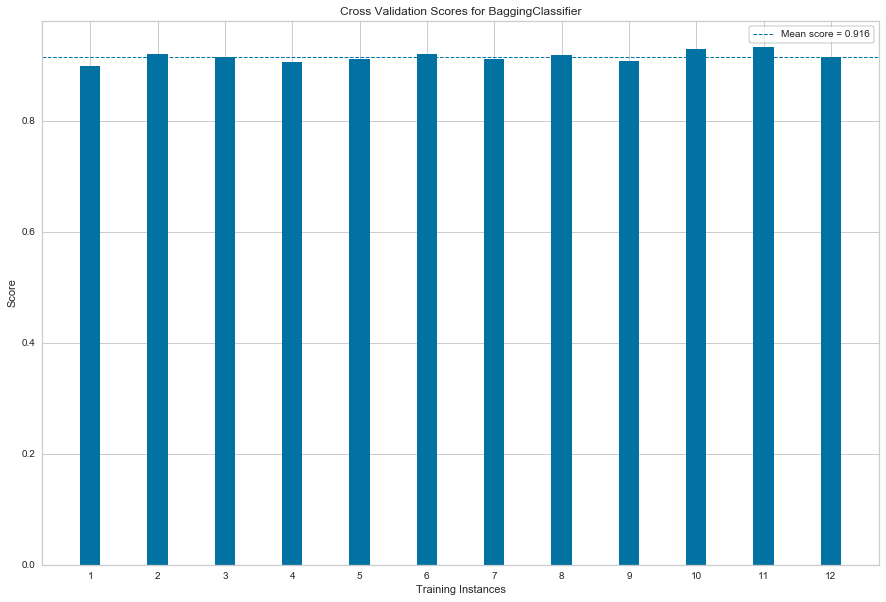

In [128]:
#Class imbalance and Scaler adjustments for BaggingClassifier

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = BaggingClassifier()
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_std, y)
visualizer.show()



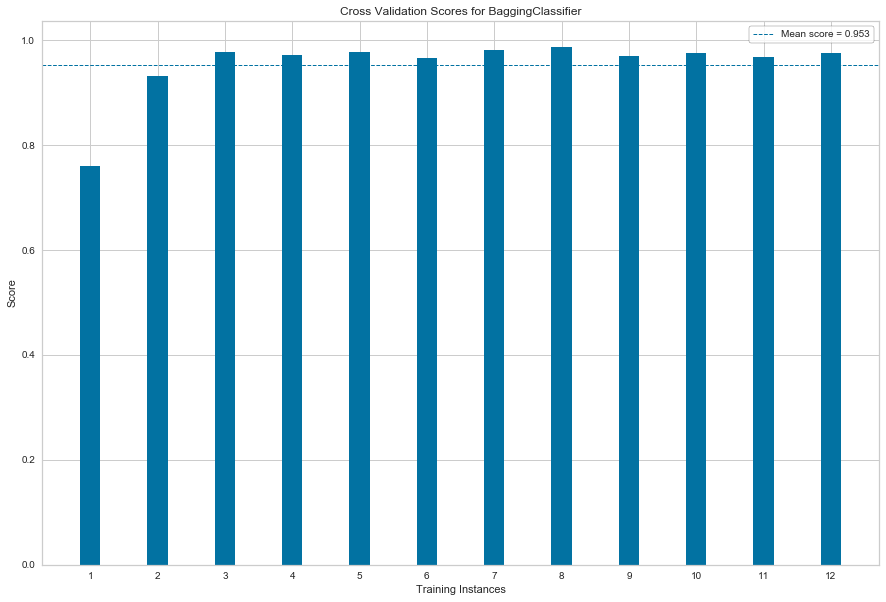

In [129]:
#Class imbalance and Scaler adjustments and SMOTE for BaggingClassifier
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = BaggingClassifier()
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_res, y_train_res)
visualizer.show()

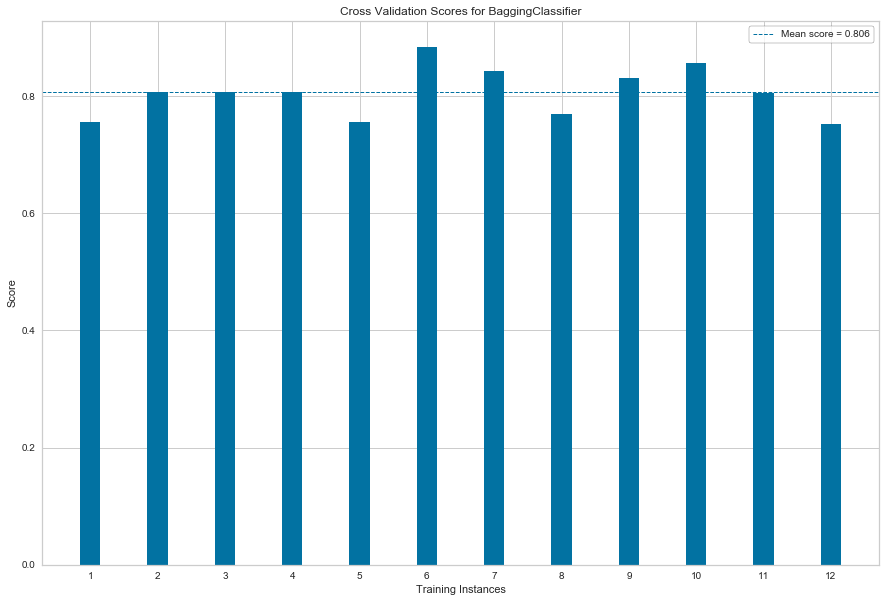

In [130]:
#Class imbalance and Scaler adjustments and NearMiss for BaggingClassifier

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = BaggingClassifier()
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_miss, y_train_miss)
visualizer.show()

ExtraTreesClassifier

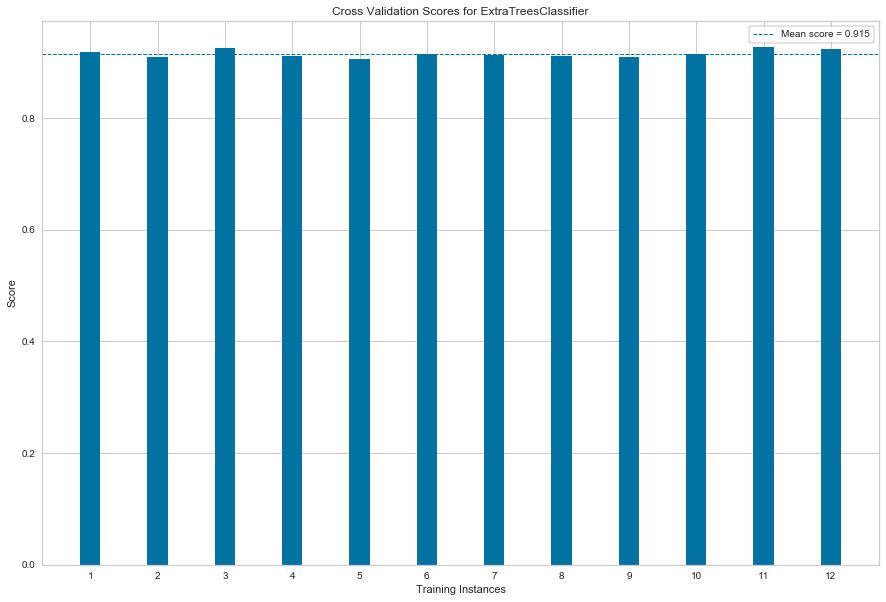

In [131]:
#Class imbalance and Scaler adjustments for ExtraTreesClassifier
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = ExtraTreesClassifier(n_estimators=100, class_weight='balanced')
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_std, y)
visualizer.show()

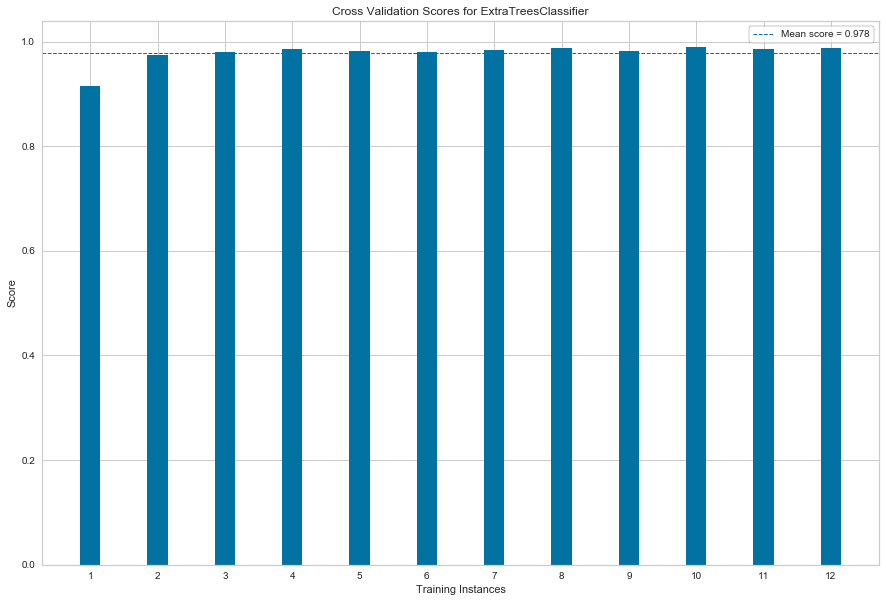

In [132]:
#Class imbalance and Scaler adjustments and SMOTE for ExtraTreesClassifier
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = ExtraTreesClassifier(n_estimators=100, class_weight='balanced')
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_res, y_train_res)
visualizer.show()

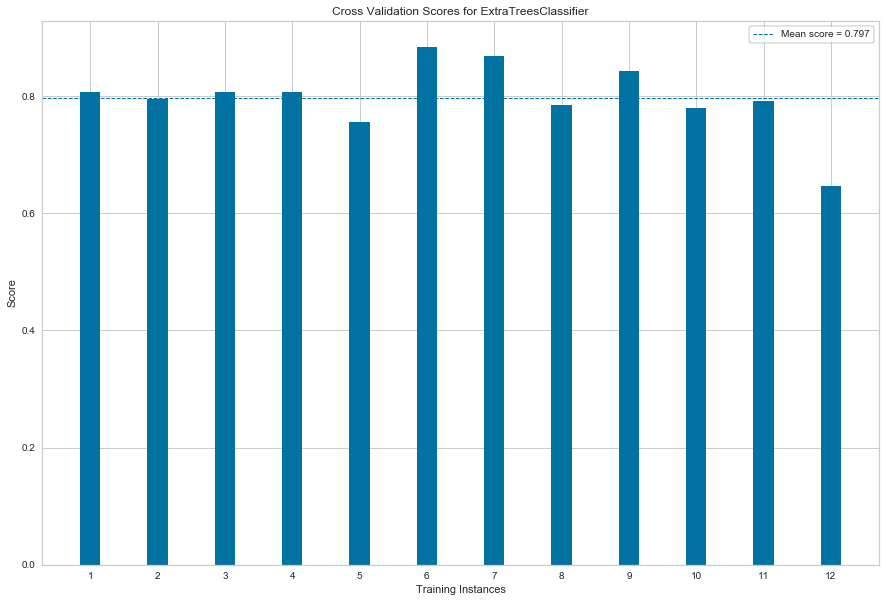

In [133]:
#Class imbalance and Scaler adjustments and NearMiss for ExtraTreesClassifier
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = ExtraTreesClassifier(n_estimators=100, class_weight='balanced')
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_miss, y_train_miss)
visualizer.show()

In [ ]:
BalancedRandomForest

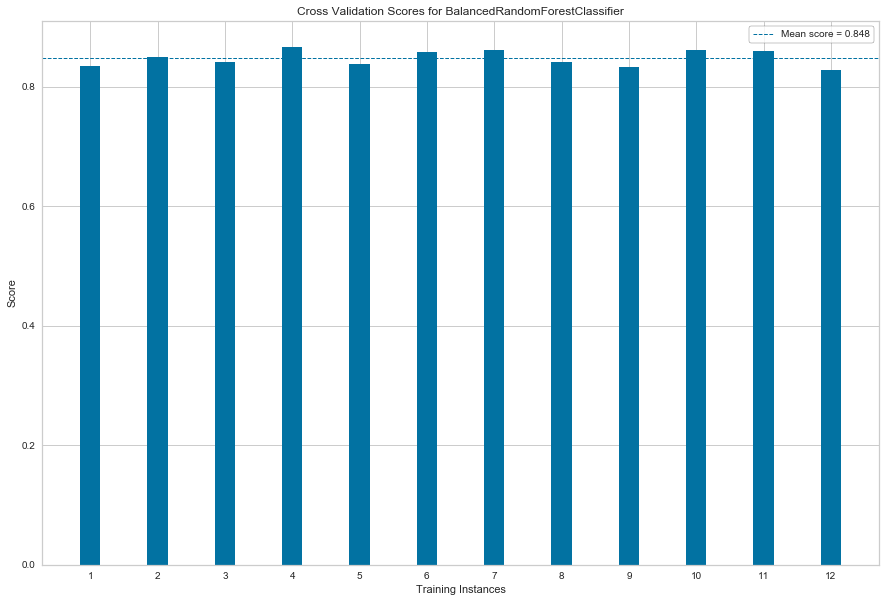

In [134]:
#Class imbalance and Scaler adjustments for BalancedRandomForestClassifier

from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores


# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = BalancedRandomForestClassifier(n_estimators=100)
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_std, y)
visualizer.show()

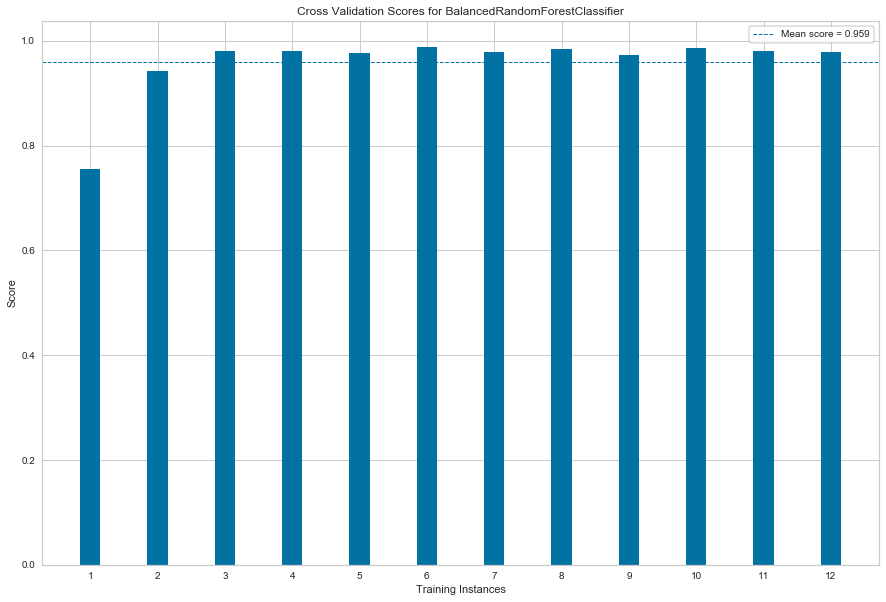

In [135]:
#Class imbalance and Scaler adjustments and SMOTE for BalancedRandomForestClassifier

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = BalancedRandomForestClassifier(n_estimators=100)
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_res, y_train_res)
visualizer.show()

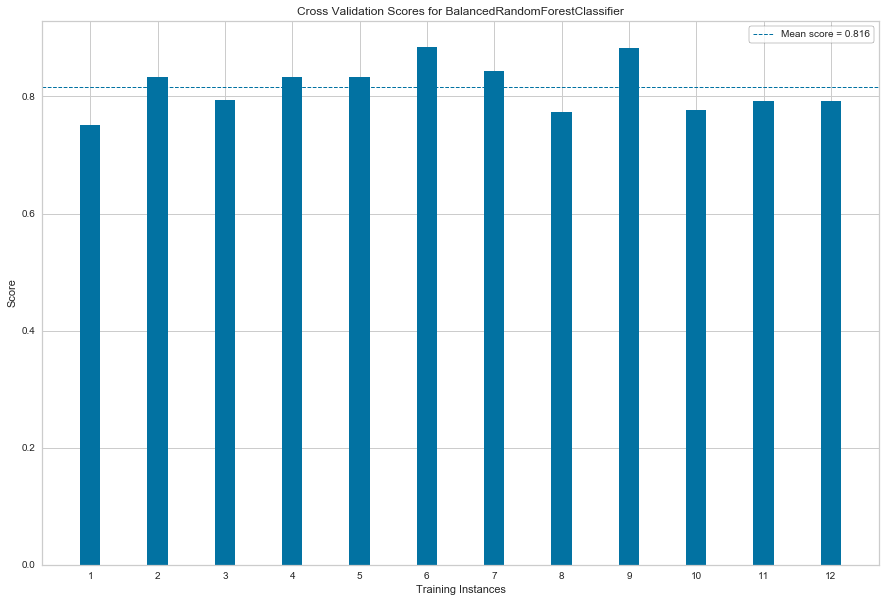

In [136]:
#Class imbalance and Scaler adjustments and NearMiss for BalancedRandomForestClassifier

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = BalancedRandomForestClassifier(n_estimators=100)
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_miss, y_train_miss)
visualizer.show()

NuSVC

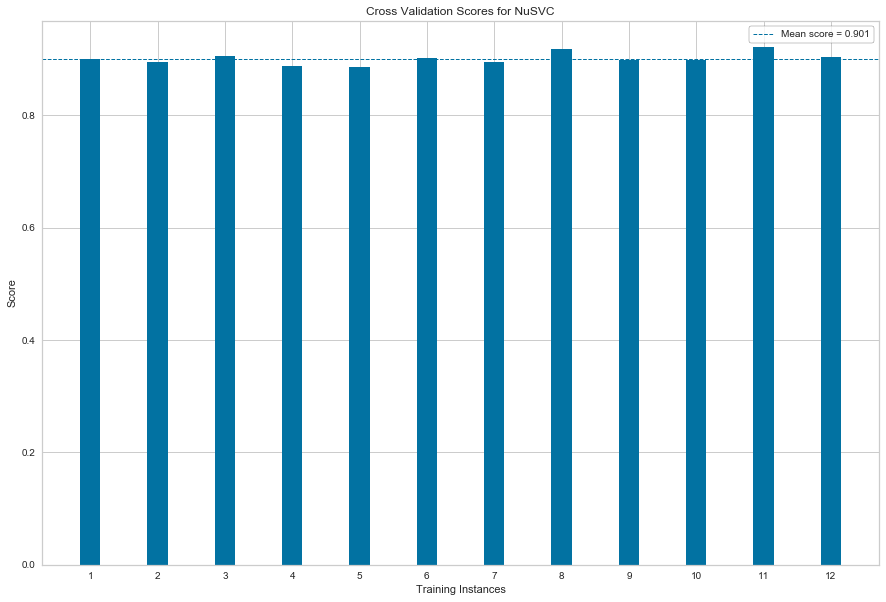

In [137]:
#Class imbalance and Scaler adjustments for NuSVC

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = NuSVC(nu=0.1, gamma='auto', class_weight='balanced')
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_std, y)
visualizer.show()

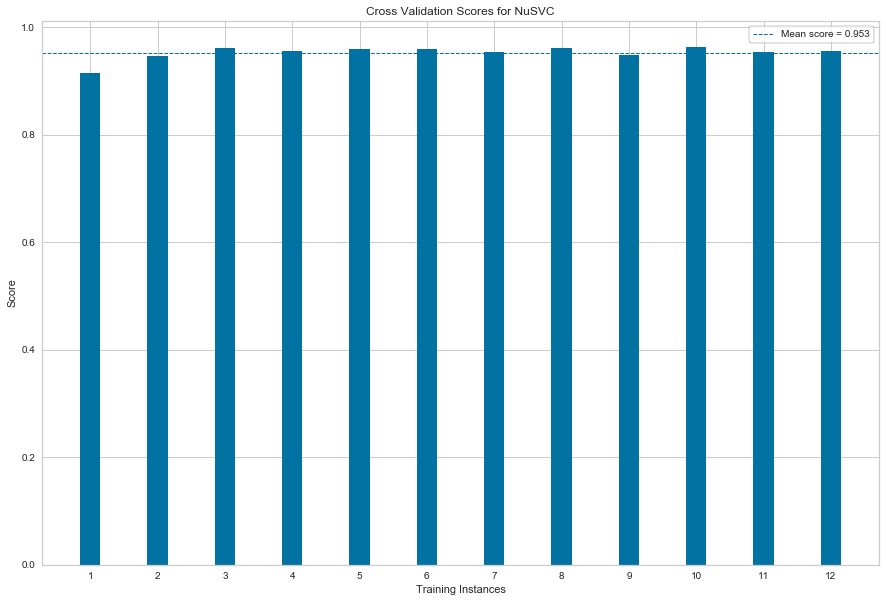

In [138]:
#Class imbalance and Scaler adjustments and SMOTE for NuSVC

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = NuSVC(nu=0.1, gamma='auto', class_weight='balanced')
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_res, y_train_res)
visualizer.show()

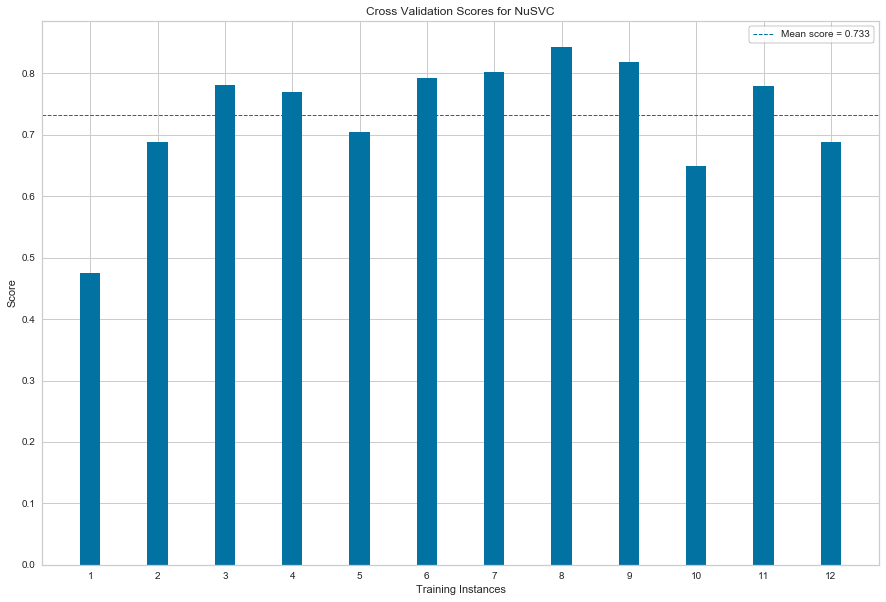

In [139]:
#Class imbalance and Scaler adjustments and NearMiss for NuSVC
# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = NuSVC(nu=0.1, gamma='auto', class_weight='balanced')
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_train_miss, y_train_miss)
visualizer.show()

AUC for BAgging Classifier

In [140]:
from sklearn import model_selection
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

In [141]:
#Class imbalance and Scaler adjustments for BaggingClassifier 

#test size
test_size = 0.33

seed = 7

#Model instance
model = BaggingClassifier()

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

BaggingClassifier()

In [142]:
#Class imbalance and Scaler adjustments for BaggingClassifier()
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [143]:
#Class imbalance and Scaler adjustments for BaggingClassifier()
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 79.50%


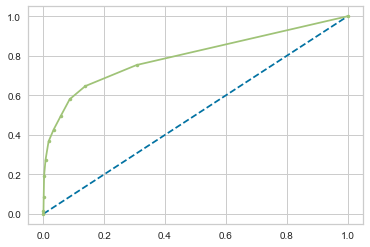

In [144]:
#Class imbalance and Scaler adjustments for BaggingClassifier()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [145]:
#Class imbalance and Scaler adjustments and SMOTE for BaggingClassifier()
#test size
test_size = 0.33

seed = 7

#Model instance
model = BaggingClassifier()

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train_res, y_train_res, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

BaggingClassifier()

In [146]:
#Class imbalance and Scaler adjustments and SMOTE for BaggingClassifier()
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [147]:
#Class imbalance and Scaler adjustments and SMOTE for BaggingClassifier()
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 98.16%


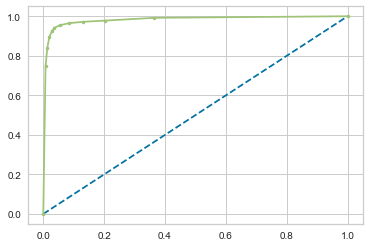

In [148]:
#Class imbalance and Scaler adjustments and SMOTE for BaggingClassifier()
# calculate roc curve After SMOTE application
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [149]:
#Class imbalance and Scaler adjustments and NearMiss for BaggingClassifier()
#test size
test_size = 0.33

seed = 7

#Model instance
model = BaggingClassifier()

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train_miss, y_train_miss, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

BaggingClassifier()

In [150]:
#Class imbalance and Scaler adjustments and NearMiss for BaggingClassifier()
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [151]:
#Class imbalance and Scaler adjustments and NearMiss for BaggingClassifier()
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 85.04%


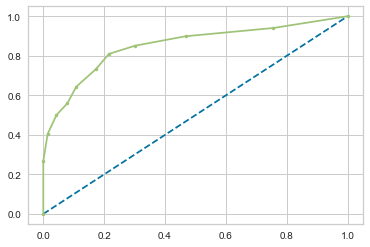

In [152]:
#Class imbalance and Scaler adjustments and NearMiss for BaggingClassifier()
#NearMiss 
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Unable to produce AUC for NuSVC NuSVC and SVC due to errors (specified nu is infeasible, and probablility error)

AUC for BalancedRandomForestClassifier

In [153]:
#Class imbalance and Scaler adjustments for BalancedRandomForestClassifier
#test size
test_size = 0.33

seed = 7

#Model instance
model = BalancedRandomForestClassifier()

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

BalancedRandomForestClassifier()

In [154]:
#Class imbalance and Scaler adjustments for BalancedRandomForestClassifier
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [155]:
#Class imbalance and Scaler adjustments for BalancedRandomForestClassifier
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 84.97%


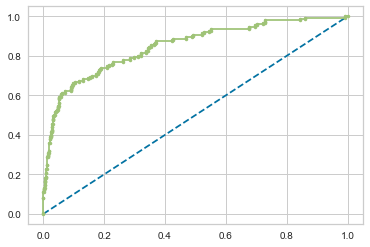

In [156]:
#Class imbalance and Scaler adjustments for BalancedRandomForestClassifier
# calculate roc curve After SMOTE application
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [157]:
#Class imbalance and Scaler adjustments and SMOTE for BalancedRandomForestClassifier
#test size
test_size = 0.33

seed = 7

#Model instance
model = BalancedRandomForestClassifier()

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train_res, y_train_res, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

BalancedRandomForestClassifier()

In [159]:
#Class imbalance and Scaler adjustments and SMOTE for BalancedRandomForestClassifier
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [160]:
#Class imbalance and Scaler adjustments and SMOTE for BalancedRandomForestClassifier
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 99.06%


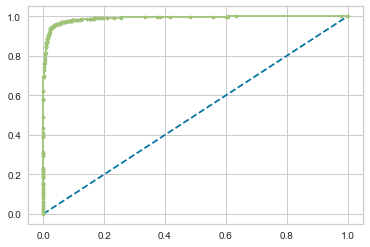

In [161]:
#Class imbalance and Scaler adjustments and SMOTE for BalancedRandomForestClassifier
# calculate roc curve After SMOTE application
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [162]:
#Class imbalance and Scaler adjustments and NearMiss for BalancedRandomForestClassifier

#test size
test_size = 0.33

seed = 7

#Model instance
model = BalancedRandomForestClassifier()

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train_miss, y_train_miss, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

BalancedRandomForestClassifier()

In [163]:
#Class imbalance and Scaler adjustments and NearMiss for BalancedRandomForestClassifier
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [164]:
#Class imbalance and Scaler adjustments and NearMiss for BalancedRandomForestClassifier
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 87.97%


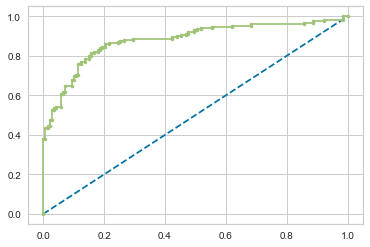

In [165]:
#Class imbalance and Scaler adjustments and NearMiss for BalancedRandomForestClassifier
# calculate roc curve After SMOTE application
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC for ExtraTreesClassifier

In [166]:
#Class imbalance and Scaler adjustments for ExtraTreesClassifier

#test size
test_size = 0.33

seed = 7

#Model instance
model = ExtraTreesClassifier()

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [167]:
#Class imbalance and Scaler adjustments for ExtraTreesClassifier
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [168]:
#Class imbalance and Scaler adjustments for ExtraTreesClassifier
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 85.75%


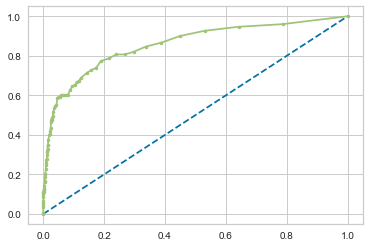

In [169]:
#Class imbalance and Scaler adjustments for ExtraTreesClassifier
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [170]:
#Class imbalance and Scaler adjustments and SMOTE for ExtraTreesClassifier

#test size
test_size = 0.33

seed = 7

#Model instance
model = ExtraTreesClassifier()

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train_res, y_train_res, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [171]:
#Class imbalance and Scaler adjustments and SMOTE for ExtraTreesClassifier
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [172]:
#Class imbalance and Scaler adjustments and SMOTE for ExtraTreesClassifier
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 99.48%


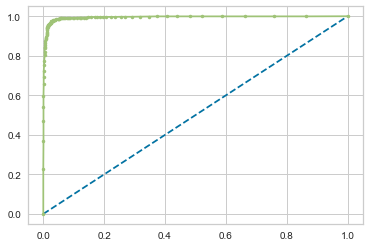

In [173]:
#Class imbalance and Scaler adjustments and SMOTE for ExtraTreesClassifier
# calculate roc curve After SMOTE application
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [174]:
#Class imbalance and Scaler adjustments and NearMiss for ExtraTreesClassifier
#test size
test_size = 0.33

seed = 7

#Model instance
model = ExtraTreesClassifier()

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train_miss, y_train_miss, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [175]:
#Class imbalance and Scaler adjustments and NearMiss for ExtraTreesClassifier
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [176]:
#Class imbalance and Scaler adjustments and NearMiss for ExtraTreesClassifier
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 89.23%


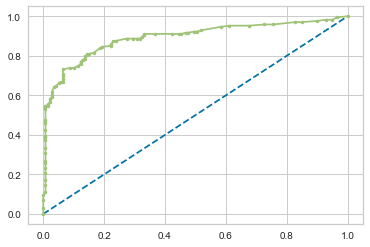

In [177]:
#Class imbalance and Scaler adjustments and NearMiss for ExtraTreesClassifier
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()